# ii. Import Libraries
> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.



In [510]:
# Import Libraries

# Buat memproses data
import pandas as pd
import numpy as np

# Buat memproses grafik
import seaborn as sns
import matplotlib.pyplot as plt

# Buat Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Buat definisi model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Buat evaluasi model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, accuracy_score, f1_score

# Buat import hasil model saving
import json
import pickle

# iii. Data Loading
> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [511]:
# Memasukkan CSV menjadi dataFrame
df = pd.read_csv ('Diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   952 non-null    object 
 1   gender                952 non-null    object 
 2   family_diabetes       952 non-null    object 
 3   high_blood_pressure   952 non-null    object 
 4   physically_active     952 non-null    object 
 5   bmi                   948 non-null    float64
 6   smoking               952 non-null    object 
 7   alcohol               952 non-null    object 
 8   sleep_hours           952 non-null    int64  
 9   sound_sleep           952 non-null    int64  
 10  regular_medicine      952 non-null    object 
 11  junk_food             952 non-null    object 
 12  stress_level          952 non-null    object 
 13  blood_pressure_level  952 non-null    object 
 14  pregnancies           910 non-null    float64
 15  gestation_diabetes    9

In [512]:
# Memperlihatkan 5 data atas dan 5 data bawah
df

,age,gender,family_diabetes,high_blood_pressure,physically_active,bmi,smoking,alcohol,sleep_hours,sound_sleep,regular_medicine,junk_food,stress_level,blood_pressure_level,pregnancies,gestation_diabetes,urination,diabetic
0,less than 40,male,yes,no,more than half an hour,24.0,yes,no,8,8,no,occasionally,sometimes,normal,0.0,no,not much,no
1,60 or older,female,yes,yes,less than half an hour,33.0,no,no,6,5,yes,occasionally,sometimes,high,2.0,no,not much,yes
2,less than 40,female,no,no,more than half an hour,33.0,no,no,8,4,no,occasionally,sometimes,normal,0.0,no,quite often,no
3,less than 40,male,yes,no,less than half an hour,20.0,no,no,7,4,no,often,sometimes,normal,0.0,no,quite often,no
4,50-59,male,yes,no,one hour or more,23.0,yes,yes,5,4,yes,occasionally,very often,normal,0.0,no,not much,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,40-49,female,no,no,one hour or more,21.0,no,no,7,7,no,occasionally,sometimes,normal,3.0,no,quite often,no
948,less than 40,female,no,no,less than half an hour,21.0,no,no,6,6,no,occasionally,sometimes,normal,1.0,no,not much,no
949,60 or older,male,no,no,none,27.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,no,not much,no
950,40-49,male,yes,no,none,29.0,no,no,6,6,no,occasionally,not at all,normal,0.0,no,not much,no


## Penjelasan Kolom

| Column | Description |
| --- | --- |
| `age` | Age of a patient |
| `gender` | Gender of a patient |
| `family_diabetes` | Family history with diabetes |
| `high_blood_pressure` | Diagnosed with high blood pressure |
| `physically_active` | Length of walk / run / physically active |
| `bmi` | Body Mass Index (BMI) |
| `smoking` | Whether a patient is a smoker or not |
| `alcohol` | Whether a patient is consume alcohol or not |
| `sleep_hours` | Hours of sleep |
| `sound_sleep` | Hours of snore |
| `regular_medicine` | Whether a patient consume regular medicine or not |
| `junk_food` | Junk food consumption |
| `stress_level` | Level of stress |
| `blood_pressure_level` | Level of blood pressure |
| `pregnancies` | Number of pregnancies |
| `gestation_diabetes` | Gestation diabetes (A type of diabetes that can develop during pregnancy in women who don't already have diabetes) |
| `urination` | Frequency of urination |
| `diabetic` | Whethe a patient is diabetic or not |

Catatan : 

1. Nilai `sound_sleep` ≤ nilai `sleep_hours`.

2. Jika seseorang memiliki `sound_sleep = 3` dan `sleep_hours = 8`, artinya pasien tersebut memiliki jam tidur 
sebanyak 8 jam dan diantara 8 jam tersebut, ia tidur dengan mengeluarkan suara (mengorok) sebanyak 3 jam.

# iv. Exploratory Data Analysis (EDA)
> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

## 1. Waktu Tidur

In [513]:
# Membuat kategori waktu tidur
kategori = []
for i in df['sleep_hours']:
    if i <= 4: kategori.append('less')
    elif i < 6: kategori.append ('little')
    elif i < 8: kategori.append ('normal')
    else: kategori.append ('over')

df ['kategori'] = kategori
df

,age,gender,family_diabetes,high_blood_pressure,physically_active,bmi,smoking,alcohol,sleep_hours,sound_sleep,regular_medicine,junk_food,stress_level,blood_pressure_level,pregnancies,gestation_diabetes,urination,diabetic,kategori
0,less than 40,male,yes,no,more than half an hour,24.0,yes,no,8,8,no,occasionally,sometimes,normal,0.0,no,not much,no,over
1,60 or older,female,yes,yes,less than half an hour,33.0,no,no,6,5,yes,occasionally,sometimes,high,2.0,no,not much,yes,normal
2,less than 40,female,no,no,more than half an hour,33.0,no,no,8,4,no,occasionally,sometimes,normal,0.0,no,quite often,no,over
3,less than 40,male,yes,no,less than half an hour,20.0,no,no,7,4,no,often,sometimes,normal,0.0,no,quite often,no,normal
4,50-59,male,yes,no,one hour or more,23.0,yes,yes,5,4,yes,occasionally,very often,normal,0.0,no,not much,yes,little
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,40-49,female,no,no,one hour or more,21.0,no,no,7,7,no,occasionally,sometimes,normal,3.0,no,quite often,no,normal
948,less than 40,female,no,no,less than half an hour,21.0,no,no,6,6,no,occasionally,sometimes,normal,1.0,no,not much,no,normal
949,60 or older,male,no,no,none,27.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,no,not much,no,normal
950,40-49,male,yes,no,none,29.0,no,no,6,6,no,occasionally,not at all,normal,0.0,no,not much,no,normal


Text(0.5, 1.0, 'Kategori waktu tidur')

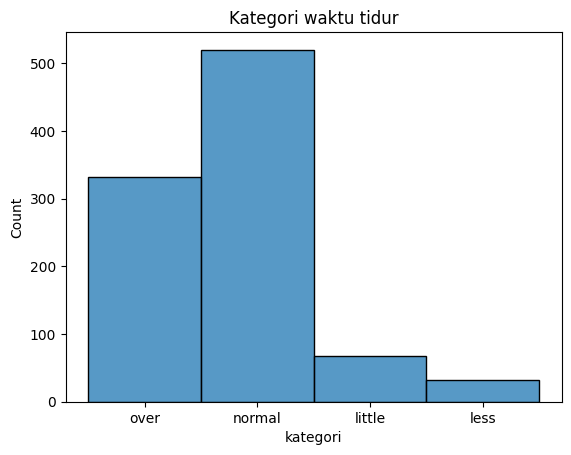

In [514]:
# Membuat visualisasi
sns.histplot(df['kategori'], bins=30)
plt.title('Kategori waktu tidur')

## 2. Hubungan jam tidur dengan penyakit diabetes

In [515]:
df['hours_clean_sleep'] = df['sleep_hours'] - df['sound_sleep']
df

,age,gender,family_diabetes,high_blood_pressure,physically_active,bmi,smoking,alcohol,sleep_hours,sound_sleep,regular_medicine,junk_food,stress_level,blood_pressure_level,pregnancies,gestation_diabetes,urination,diabetic,kategori,hours_clean_sleep
0,less than 40,male,yes,no,more than half an hour,24.0,yes,no,8,8,no,occasionally,sometimes,normal,0.0,no,not much,no,over,0
1,60 or older,female,yes,yes,less than half an hour,33.0,no,no,6,5,yes,occasionally,sometimes,high,2.0,no,not much,yes,normal,1
2,less than 40,female,no,no,more than half an hour,33.0,no,no,8,4,no,occasionally,sometimes,normal,0.0,no,quite often,no,over,4
3,less than 40,male,yes,no,less than half an hour,20.0,no,no,7,4,no,often,sometimes,normal,0.0,no,quite often,no,normal,3
4,50-59,male,yes,no,one hour or more,23.0,yes,yes,5,4,yes,occasionally,very often,normal,0.0,no,not much,yes,little,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,40-49,female,no,no,one hour or more,21.0,no,no,7,7,no,occasionally,sometimes,normal,3.0,no,quite often,no,normal,0
948,less than 40,female,no,no,less than half an hour,21.0,no,no,6,6,no,occasionally,sometimes,normal,1.0,no,not much,no,normal,0
949,60 or older,male,no,no,none,27.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,no,not much,no,normal,0
950,40-49,male,yes,no,none,29.0,no,no,6,6,no,occasionally,not at all,normal,0.0,no,not much,no,normal,0


<Axes: xlabel='sleep_hours', ylabel='sound_sleep'>

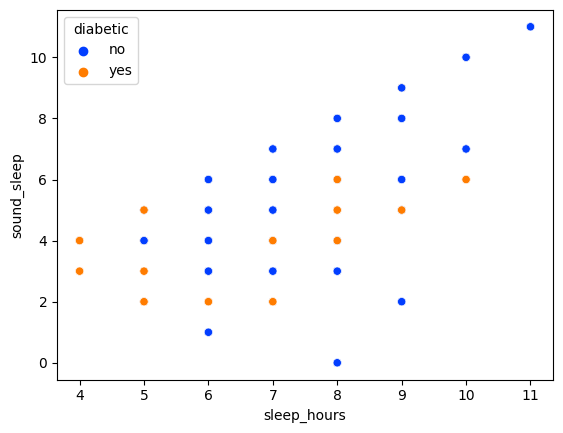

In [516]:
sns.scatterplot (x='sleep_hours', y='sound_sleep', data=df, hue="diabetic", palette='bright')

> Berdasarkan grafik diatas, kemungkinan seseorang terkena penyakit diabetes tidak bergantung dengan jam tidur

## 3. Perbandingan tiap kolom

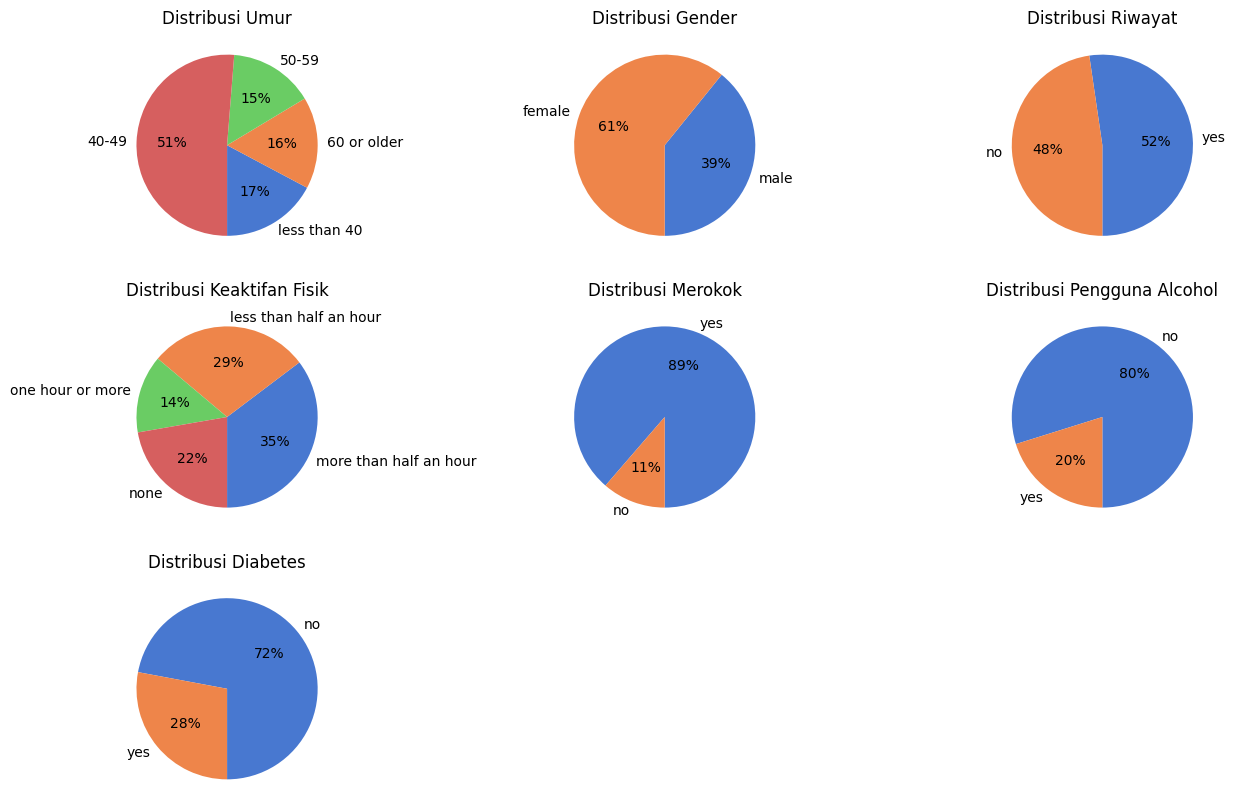

In [517]:
plt.figure(figsize=(16, 10))
palette_color = sns.color_palette('muted')

ax1 = plt.subplot(3, 3, 1)
plt.pie(df.groupby(['age'])['age'].count(), colors=palette_color, autopct='%.0f%%', startangle=270, labels=df['age'].unique())
ax1 = plt.title ('Distribusi Umur')

ax2 = plt.subplot (3, 3, 2)
plt.pie(df.groupby(['gender'])['gender'].count(), colors=palette_color, autopct='%.0f%%', startangle=270, labels=df['gender'].unique())
ax2 = plt.title ('Distribusi Gender')

ax3 = plt.subplot (3, 3, 3)
plt.pie(df.groupby(['family_diabetes'])['family_diabetes'].count(), colors=palette_color, autopct='%.0f%%', startangle=270, labels=df['family_diabetes'].unique())
ax3 = plt.title ('Distribusi Riwayat')

ax4 = plt.subplot (3, 3, 4)
plt.pie(df.groupby(['physically_active'])['physically_active'].count(), colors=palette_color, autopct='%.0f%%', startangle=270, labels=df['physically_active'].unique())
ax4 = plt.title ('Distribusi Keaktifan Fisik')

ax5 = plt.subplot (3, 3, 5)
plt.pie(df.groupby(['smoking'])['smoking'].count(), colors=palette_color, autopct='%.0f%%', startangle=270, labels=df['smoking'].unique())
ax5 = plt.title ('Distribusi Merokok')

ax6 = plt.subplot (3, 3, 6)
plt.pie(df.groupby(['alcohol'])['alcohol'].count(), colors=palette_color, autopct='%.0f%%', startangle=270, labels=df['alcohol'].unique())
ax6 = plt.title ('Distribusi Pengguna Alcohol')

ax7 = plt.subplot (3, 3, 7)
plt.pie(df.groupby(['diabetic'])['diabetic'].count(), colors=palette_color, autopct='%.0f%%', startangle=270, labels=df['diabetic'].unique())
ax6 = plt.title ('Distribusi Diabetes')

In [518]:
df.groupby(['diabetic'])['diabetic'].count()

diabetic
no     686
yes    266
Name: diabetic, dtype: int64

# v. Feature Engineering
> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Split X (Features) dan y (Target)

In [519]:
X = df.drop(['diabetic'], axis=1)
y = df['diabetic']

print (X.shape)
print (y.shape)

(952, 19)
(952,)


## Split Train-Set dan Test-Set


In [520]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 1509)

print ('X Train Size', X_train.shape)
print ('X Test Size:', X_test.shape)
print ()
print ('y Train Size', y_train.shape)
print ('y Test Size:', y_test.shape)

X_train_1 = X_train.copy()

X Train Size (761, 19)
X Test Size: (191, 19)

y Train Size (761,)
y Test Size: (191,)


## Handle Missing Value

In [521]:
# X_train
X_train.isnull().sum()

age                      0
gender                   0
family_diabetes          0
high_blood_pressure      0
physically_active        0
bmi                      4
smoking                  0
alcohol                  0
sleep_hours              0
sound_sleep              0
regular_medicine         0
junk_food                0
stress_level             0
blood_pressure_level     0
pregnancies             36
gestation_diabetes       1
urination                0
kategori                 0
hours_clean_sleep        0
dtype: int64

In [522]:
X_train[X_train[['bmi', 'pregnancies', 'gestation_diabetes']].isna().any(axis=1)]

,age,gender,family_diabetes,high_blood_pressure,physically_active,bmi,smoking,alcohol,sleep_hours,sound_sleep,regular_medicine,junk_food,stress_level,blood_pressure_level,pregnancies,gestation_diabetes,urination,kategori,hours_clean_sleep
726,40-49,female,yes,no,more than half an hour,36.0,no,no,7,3,yes,occasionally,sometimes,normal,NaN,no,quite often,normal,4
227,less than 40,female,yes,no,none,21.0,no,yes,8,8,no,occasionally,sometimes,normal,NaN,no,not much,over,0
601,60 or older,male,no,yes,less than half an hour,33.0,no,no,6,2,yes,occasionally,very often,high,NaN,no,quite often,normal,4
809,50-59,male,no,no,less than half an hour,38.0,no,no,6,3,yes,occasionally,sometimes,normal,NaN,no,quite often,normal,3
255,less than 40,female,no,no,less than half an hour,33.0,no,no,8,3,no,occasionally,sometimes,normal,NaN,no,quite often,over,5
333,40-49,female,yes,no,less than half an hour,36.0,no,no,7,5,no,occasionally,sometimes,normal,NaN,no,quite often,normal,2
694,50-59,female,no,yes,more than half an hour,33.0,no,no,6,4,yes,occasionally,sometimes,high,NaN,no,quite often,normal,2
279,less than 40,female,yes,no,more than half an hour,24.0,no,no,8,8,yes,often,sometimes,normal,NaN,no,quite often,over,0
713,less than 40,female,no,no,more than half an hour,NaN,no,no,5,4,no,often,very often,normal,0.0,no,not much,little,1
795,less than 40,female,no,no,less than half an hour,33.0,no,no,7,4,no,occasionally,sometimes,normal,NaN,no,quite often,normal,3


In [523]:
# Merubah pregnancies pada male menjadi 0 karena laki-laki tidak mengandung
X_train.loc[X_train['gender'] == 'male', 'pregnancies'] = 0
X_train 

,age,gender,family_diabetes,high_blood_pressure,physically_active,bmi,smoking,alcohol,sleep_hours,sound_sleep,regular_medicine,junk_food,stress_level,blood_pressure_level,pregnancies,gestation_diabetes,urination,kategori,hours_clean_sleep
163,less than 40,male,no,no,none,20.0,no,no,7,7,no,occasionally,not at all,normal,0.0,no,not much,normal,0
258,50-59,female,yes,no,one hour or more,23.0,no,no,6,5,no,occasionally,sometimes,high,2.0,no,not much,normal,1
12,60 or older,male,no,yes,less than half an hour,27.0,no,yes,6,5,yes,occasionally,very often,high,0.0,no,not much,normal,1
17,less than 40,male,no,no,one hour or more,21.0,no,no,7,6,yes,often,very often,normal,0.0,no,not much,normal,1
564,50-59,female,no,yes,one hour or more,22.0,no,no,8,5,yes,occasionally,always,normal,3.0,no,not much,over,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,less than 40,male,no,no,less than half an hour,23.0,yes,no,6,3,no,occasionally,very often,normal,0.0,no,not much,normal,3
733,less than 40,male,no,no,more than half an hour,30.0,no,no,7,4,no,occasionally,sometimes,normal,0.0,no,not much,normal,3
434,40-49,male,no,no,less than half an hour,38.0,no,no,5,4,yes,occasionally,sometimes,normal,0.0,no,quite often,little,1
30,less than 40,male,yes,yes,more than half an hour,27.0,no,no,7,5,no,occasionally,sometimes,high,0.0,no,not much,normal,2


In [524]:
# menghilangkan data NaN
X_train = X_train.dropna()
X_train

,age,gender,family_diabetes,high_blood_pressure,physically_active,bmi,smoking,alcohol,sleep_hours,sound_sleep,regular_medicine,junk_food,stress_level,blood_pressure_level,pregnancies,gestation_diabetes,urination,kategori,hours_clean_sleep
163,less than 40,male,no,no,none,20.0,no,no,7,7,no,occasionally,not at all,normal,0.0,no,not much,normal,0
258,50-59,female,yes,no,one hour or more,23.0,no,no,6,5,no,occasionally,sometimes,high,2.0,no,not much,normal,1
12,60 or older,male,no,yes,less than half an hour,27.0,no,yes,6,5,yes,occasionally,very often,high,0.0,no,not much,normal,1
17,less than 40,male,no,no,one hour or more,21.0,no,no,7,6,yes,often,very often,normal,0.0,no,not much,normal,1
564,50-59,female,no,yes,one hour or more,22.0,no,no,8,5,yes,occasionally,always,normal,3.0,no,not much,over,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,less than 40,male,no,no,less than half an hour,23.0,yes,no,6,3,no,occasionally,very often,normal,0.0,no,not much,normal,3
733,less than 40,male,no,no,more than half an hour,30.0,no,no,7,4,no,occasionally,sometimes,normal,0.0,no,not much,normal,3
434,40-49,male,no,no,less than half an hour,38.0,no,no,5,4,yes,occasionally,sometimes,normal,0.0,no,quite often,little,1
30,less than 40,male,yes,yes,more than half an hour,27.0,no,no,7,5,no,occasionally,sometimes,high,0.0,no,not much,normal,2


In [525]:
# X_test
X_test.isnull().sum()

age                     0
gender                  0
family_diabetes         0
high_blood_pressure     0
physically_active       0
bmi                     0
smoking                 0
alcohol                 0
sleep_hours             0
sound_sleep             0
regular_medicine        0
junk_food               0
stress_level            0
blood_pressure_level    0
pregnancies             6
gestation_diabetes      0
urination               0
kategori                0
hours_clean_sleep       0
dtype: int64

In [526]:
X_test[X_test[['pregnancies']].isna().any(axis=1)]

# Merubah pregnancies pada male menjadi 0 karena laki-laki tidak mengandung
X_test.loc[X_test['gender'] == 'male', 'pregnancies'] = 0

# menghilangkan data NaN
X_test = X_test.dropna()
X_test

,age,gender,family_diabetes,high_blood_pressure,physically_active,bmi,smoking,alcohol,sleep_hours,sound_sleep,regular_medicine,junk_food,stress_level,blood_pressure_level,pregnancies,gestation_diabetes,urination,kategori,hours_clean_sleep
855,less than 40,female,no,no,less than half an hour,19.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,no,not much,over,0
166,less than 40,male,no,no,more than half an hour,18.0,no,no,6,1,no,always,sometimes,normal,0.0,no,quite often,normal,5
284,40-49,male,no,no,more than half an hour,23.0,no,no,7,4,no,often,sometimes,normal,0.0,no,not much,normal,3
157,40-49,female,yes,no,less than half an hour,33.0,no,no,6,6,no,very often,very often,normal,2.0,yes,not much,normal,0
413,less than 40,male,yes,no,one hour or more,30.0,no,yes,9,8,no,occasionally,sometimes,normal,0.0,no,not much,over,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,less than 40,female,yes,no,one hour or more,27.0,no,yes,8,6,no,very often,very often,normal,0.0,no,not much,over,2
900,50-59,male,no,yes,less than half an hour,19.0,no,yes,6,6,yes,occasionally,very often,high,0.0,no,not much,normal,0
144,60 or older,male,no,no,less than half an hour,30.0,no,yes,6,2,yes,often,always,high,0.0,no,not much,normal,4
1,60 or older,female,yes,yes,less than half an hour,33.0,no,no,6,5,yes,occasionally,sometimes,high,2.0,no,not much,normal,1


In [527]:
# y_train
y_train.isnull().sum()

0

In [528]:
# y_test
y_test.isnull().sum()

0

## Handle Outlier
> Melihat apakah ada atau tidaknya outlier pada data

Skewness Value :  0.68


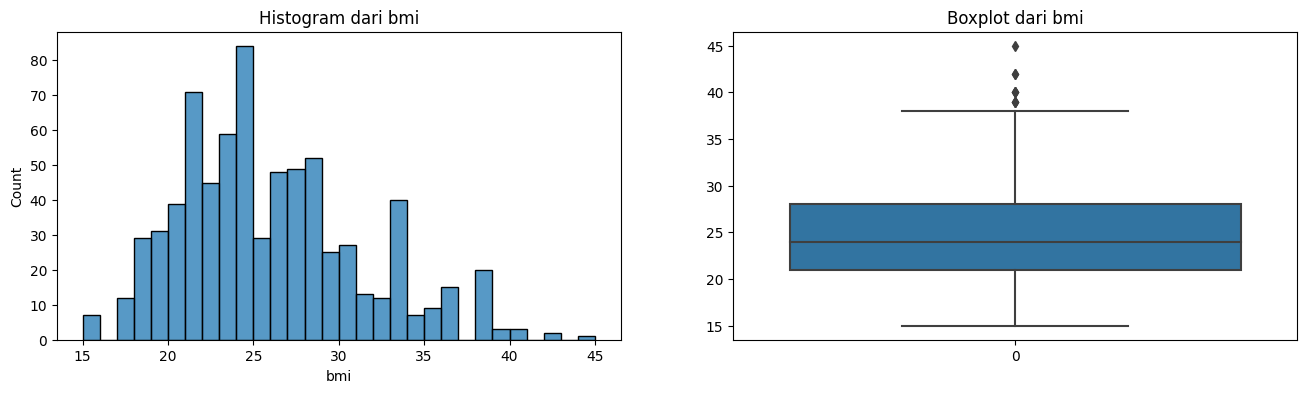

In [529]:
print('Skewness Value : ', X_train['bmi'].skew().round(decimals=2))

plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(X_train['bmi'], bins=30)
plt.title('Histogram dari bmi')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(X_train['bmi'])
plt.title('Boxplot dari bmi')

plt.show()

In [530]:
# Membuat nilai 25 quantil yang disebut Q1 dan 75 quantil yang disebut Q3
Q1 = X_train['bmi'].quantile(0.25)
Q3 = X_train['bmi'].quantile(0.75)
print ('Nilai Q1: ', Q1)
print ('Nilai Q3: ', Q3)

# Membuat nilai IQR, dari Q3 - Q1
IQR = Q3 - Q1
print ('Nilai IQR: ', IQR)

# Membuat nilai batas bawah dengan rumus Q1 - (IQR * 1.5)
BatasBawah = Q1 - (IQR * 3)

# Membuat nilai batas atas dengan rumus Q3 + (IQR * 1.5)
BatasAtas = Q3 + (IQR * 3)

print ('Nilai Batas Bawah: ', BatasBawah)
print ('Nilai Batas Atas: ', BatasAtas)

# Menghilangkan angka-angka yang berada diluar batas bawah maupun batas atas
X_train = X_train[(X_train['bmi'] > BatasBawah) & (X_train['bmi'] < BatasAtas)]
X_test = X_test[(X_test['bmi'] > BatasBawah) & (X_test['bmi'] < BatasAtas)]

# Menampilkan jumlah nilai, sebelum dan sesudah dihilangkan datanya
print (X_train_1['bmi'].shape[0])    #Nilai sebelum
print (X_train.shape[0])             #Nilai setelah

print('Skewness Value age: ', X_train['bmi'].skew().round(decimals=2))
print('Skewness Value age: ', X_test['bmi'].skew().round(decimals=2));

Nilai Q1:  21.0
Nilai Q3:  28.0
Nilai IQR:  7.0
Nilai Batas Bawah:  0.0
Nilai Batas Atas:  49.0
761
732
Skewness Value age:  0.68
Skewness Value age:  0.54


## Feature Selection

In [531]:
# Menghilangkan data di y_train yang hilang saat outlier pada X_train
y_train = y_train.filter(items=X_train.index,axis=0)
y_test = y_test.filter(items=X_test.index,axis=0)

### Split Numeric dan Category

In [532]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(exclude=np.number).columns.tolist()

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['bmi', 'sleep_hours', 'sound_sleep', 'pregnancies', 'hours_clean_sleep']
Cat Columns :  ['age', 'gender', 'family_diabetes', 'high_blood_pressure', 'physically_active', 'smoking', 'alcohol', 'regular_medicine', 'junk_food', 'stress_level', 'blood_pressure_level', 'gestation_diabetes', 'urination', 'kategori']


In [533]:
# Memisahkan train-set dan test-set berdasarkan tipe kolom
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]
X_train_cat

,age,gender,family_diabetes,high_blood_pressure,physically_active,smoking,alcohol,regular_medicine,junk_food,stress_level,blood_pressure_level,gestation_diabetes,urination,kategori
163,less than 40,male,no,no,none,no,no,no,occasionally,not at all,normal,no,not much,normal
258,50-59,female,yes,no,one hour or more,no,no,no,occasionally,sometimes,high,no,not much,normal
12,60 or older,male,no,yes,less than half an hour,no,yes,yes,occasionally,very often,high,no,not much,normal
17,less than 40,male,no,no,one hour or more,no,no,yes,often,very often,normal,no,not much,normal
564,50-59,female,no,yes,one hour or more,no,no,yes,occasionally,always,normal,no,not much,over
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,less than 40,male,no,no,less than half an hour,yes,no,no,occasionally,very often,normal,no,not much,normal
733,less than 40,male,no,no,more than half an hour,no,no,no,occasionally,sometimes,normal,no,not much,normal
434,40-49,male,no,no,less than half an hour,no,no,yes,occasionally,sometimes,normal,no,quite often,little
30,less than 40,male,yes,yes,more than half an hour,no,no,no,occasionally,sometimes,high,no,not much,normal


## Feature Scaling

In [534]:
# Membuat scaling berdasarkan MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[0.16666667, 0.42857143, 0.63636364, 0.        , 0.        ],
       [0.26666667, 0.28571429, 0.45454545, 0.5       , 0.125     ],
       [0.4       , 0.28571429, 0.45454545, 0.        , 0.125     ],
       ...,
       [0.76666667, 0.14285714, 0.36363636, 0.        , 0.125     ],
       [0.4       , 0.42857143, 0.45454545, 0.        , 0.25      ],
       [0.2       , 0.42857143, 0.36363636, 0.        , 0.375     ]])

## Feature Encoding

In [535]:
# Menggunakan Encoder
encoder = OneHotEncoder()

X_train_cat_encoded = encoder.fit_transform(X_train_cat).toarray()
X_test_cat_encoded = encoder.transform(X_test_cat).toarray()
feature_names = encoder.get_feature_names_out().tolist()

X_train_cat_encoded

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

## Concate Numeric dan Category

In [536]:
print(X_train_num_scaled.shape)
print(X_train_cat_encoded.shape)

(732, 5)
(732, 39)


In [537]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)

X_train_final.shape

(732, 44)

In [538]:
# Membuat dataframe `X_train_final`

X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns + feature_names])
X_train_final_df

,bmi,sleep_hours,sound_sleep,pregnancies,hours_clean_sleep,age_40-49,age_50-59,age_60 or older,age_less than 40,gender_female,...,blood_pressure_level_low,blood_pressure_level_normal,gestation_diabetes_no,gestation_diabetes_yes,urination_not much,urination_quite often,kategori_less,kategori_little,kategori_normal,kategori_over
0,0.166667,0.428571,0.636364,0.00,0.000,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.266667,0.285714,0.454545,0.50,0.125,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.400000,0.285714,0.454545,0.00,0.125,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.200000,0.428571,0.545455,0.00,0.125,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.233333,0.571429,0.454545,0.75,0.375,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,0.266667,0.285714,0.272727,0.00,0.375,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
728,0.500000,0.428571,0.363636,0.00,0.375,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
729,0.766667,0.142857,0.363636,0.00,0.125,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
730,0.400000,0.428571,0.454545,0.00,0.250,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# vi. Model Definition
> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

### Decision Tree

In [539]:
# Mendefinisikan model Decision Tree
model_dtc = DecisionTreeClassifier(max_depth=4)

### Random Forest

In [540]:
# Mendefinisikan model Random Forest
model_rfc = RandomForestClassifier(n_estimators=15)

# vii. Model Training
> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.



In [541]:
# Mentraining model Decision Tree
model_dtc.fit(X_train_final, y_train)

DecisionTreeClassifier(max_depth=4)

In [542]:
# Mentraining model Random Forest
model_rfc.fit(X_train_final, y_train)

RandomForestClassifier(n_estimators=15)

# viii. Model Evaluation
> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.


## Decision Tree

In [543]:
# Membuat prediksi Decision Tree
y_pred_dtc_train = model_dtc.predict(X_train_final)
y_pred_dtc_test = model_dtc.predict(X_test_final)

y_pred_dtc_train

array(['no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes',
       'yes', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 

In [544]:
# Memperlihatkan confusion_matrix
cm_train_dtc = confusion_matrix(y_train, y_pred_dtc_train)
print('Confusion Matrix Data Train: \n', cm_train_dtc)
print(classification_report(y_train, y_pred_dtc_train))

cm_test_dtc = confusion_matrix(y_test, y_pred_dtc_test)
print('Confusion Matrix Data Test: \n', cm_test_dtc)
print(classification_report(y_test, y_pred_dtc_test))

Confusion Matrix Data Train: 
 [[503  20]
 [ 61 148]]
              precision    recall  f1-score   support

          no       0.89      0.96      0.93       523
         yes       0.88      0.71      0.79       209

    accuracy                           0.89       732
   macro avg       0.89      0.83      0.86       732
weighted avg       0.89      0.89      0.89       732

Confusion Matrix Data Test: 
 [[124  10]
 [ 18  37]]
              precision    recall  f1-score   support

          no       0.87      0.93      0.90       134
         yes       0.79      0.67      0.73        55

    accuracy                           0.85       189
   macro avg       0.83      0.80      0.81       189
weighted avg       0.85      0.85      0.85       189



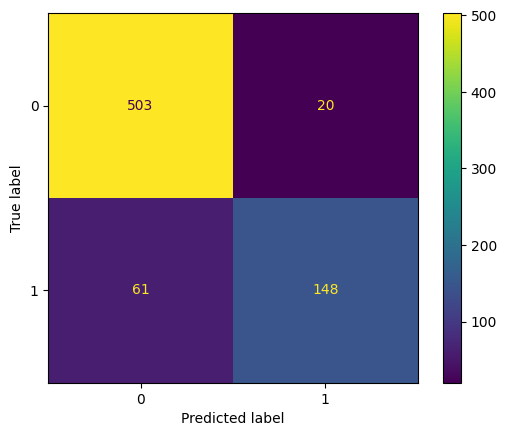

In [545]:
ConfusionMatrixDisplay(cm_train_dtc).plot()

## Random Forest

In [546]:
# Membuat prediksi Random Forest
y_pred_rfc_train = model_rfc.predict(X_train_final)
y_pred_rfc_test = model_rfc.predict(X_test_final)

y_pred_rfc_train

array(['no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no',
       'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'no', 'yes', 'yes',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no',

In [547]:
# Memperlihatkan confusion_matrix
cm_train_rfc = confusion_matrix(y_train, y_pred_rfc_train)
print('Confusion Matrix Data Train: \n', cm_train_rfc)
print(classification_report(y_train, y_pred_rfc_train))

cm_test_rfc = confusion_matrix(y_test, y_pred_rfc_test)
print('Confusion Matrix Data Test: \n', cm_test_rfc)
print(classification_report(y_test, y_pred_rfc_test))

Confusion Matrix Data Train: 
 [[518   5]
 [ 11 198]]
              precision    recall  f1-score   support

          no       0.98      0.99      0.98       523
         yes       0.98      0.95      0.96       209

    accuracy                           0.98       732
   macro avg       0.98      0.97      0.97       732
weighted avg       0.98      0.98      0.98       732

Confusion Matrix Data Test: 
 [[133   1]
 [  5  50]]
              precision    recall  f1-score   support

          no       0.96      0.99      0.98       134
         yes       0.98      0.91      0.94        55

    accuracy                           0.97       189
   macro avg       0.97      0.95      0.96       189
weighted avg       0.97      0.97      0.97       189



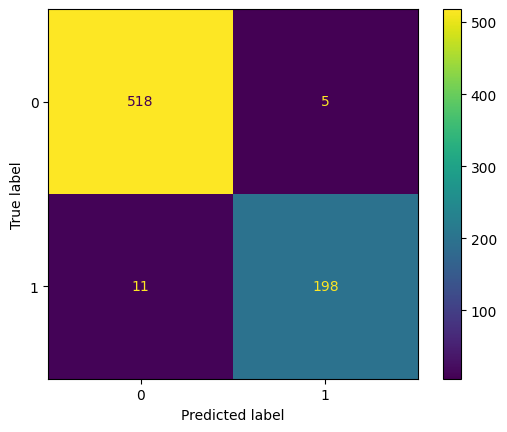

In [548]:
ConfusionMatrixDisplay(cm_train_rfc).plot()

# ix. Model Saving
> Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model.

In [549]:
# Save the Files

with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_columns, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(cat_columns, file_2)
  
with open('model_scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

with open('model_encoder.pkl', 'wb') as file_4:
  pickle.dump(encoder, file_4)

with open('model_dtc.pkl', 'wb') as file_5:
  pickle.dump(model_dtc, file_5)

with open('model_rfc.pkl', 'wb') as file_6:
  pickle.dump(model_rfc, file_6)

# x. Model Inference
> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [550]:
# Load All Files

with open('model_dtc.pkl', 'rb') as file_1:
  model_dtc = pickle.load(file_1)

with open('model_rfc.pkl', 'rb') as file_2:
  model_rfc = pickle.load(file_2)

with open('model_encoder.pkl','rb') as file_3:
  model_encoder = pickle.load(file_3)

with open('list_num_cols.txt', 'r') as file_4:
  list_num_cols = json.load(file_4)

with open('list_cat_cols.txt', 'r') as file_5:
  list_cat_cols = json.load(file_5)

with open('model_scaler.pkl', 'rb') as file_6:
  model_scaler = pickle.load(file_6)

In [551]:
df.columns

Index(['age', 'gender', 'family_diabetes', 'high_blood_pressure',
       'physically_active', 'bmi', 'smoking', 'alcohol', 'sleep_hours',
       'sound_sleep', 'regular_medicine', 'junk_food', 'stress_level',
       'blood_pressure_level', 'pregnancies', 'gestation_diabetes',
       'urination', 'diabetic', 'kategori', 'hours_clean_sleep'],
      dtype='object')

In [552]:
# Create New Data

data_inf = {
    'age' : 'less than 40', 
    'gender' : 'male', 
    'family_diabetes' : 'no', 
    'high_blood_pressure' : 'yes',
    'physically_active' : 'one hour or more', 
    'bmi' : 30.0, 
    'smoking' : 'no', 
    'alcohol' : 'no', 
    'sleep_hours': 8,
    'sound_sleep': 0, 
    'regular_medicine' : 'yes', 
    'junk_food' : 'often', 
    'stress_level' : 'very often',
    'blood_pressure_level': 'normal', 
    'pregnancies': 0, 
    'gestation_diabetes': 'no',
    'urination' : 'quite often', 
    'diabetic' : 'no',
    'kategori' : 'normal',
    'hours_clean_sleep' : '8'
}

data_inf = pd.DataFrame([data_inf])
data_inf

,age,gender,family_diabetes,high_blood_pressure,physically_active,bmi,smoking,alcohol,sleep_hours,sound_sleep,regular_medicine,junk_food,stress_level,blood_pressure_level,pregnancies,gestation_diabetes,urination,diabetic,kategori,hours_clean_sleep
0,less than 40,male,no,yes,one hour or more,30.0,no,no,8,0,yes,often,very often,normal,0,no,quite often,no,normal,8


In [553]:
# Split between Numerical Columns and Categorical Columns

data_inf_num = data_inf[list_num_cols]
data_inf_cat = data_inf[list_cat_cols]

In [554]:
# Feature Scaling and Feature Encoding

data_inf_num_scaled = model_scaler.transform(data_inf_num)
data_inf_cat_encoded = model_encoder.transform(data_inf_cat).toarray()
data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_encoded], axis=1)

In [555]:
y_pred_dtc_train_inf = model_dtc.predict(data_inf_final)
y_pred_dtc_test_inf = model_dtc.predict(data_inf_final)

y_pred_dtc_train_inf

array(['no'], dtype=object)

In [556]:
y_pred_rfc_train_inf = model_rfc.predict(data_inf_final)
y_pred_rfc_test_inf = model_rfc.predict(data_inf_final)

y_pred_rfc_train_inf

array(['no'], dtype=object)

# xi. Pengambilan Kesimpulan
> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

Berdasarkan hasil pengerjaan, dapat disimpulkan bahwa:
1. Dari EDA, terlihat bahwa:
    - Sebagian besar tidur dengan kategori 'normal', sehingga tidak rentan untuk terkena suatu penyakit
    - Berdasarkan grafik pada perbandingan antar `sleep_hours` dengan `sound_sleep`, kemungkinan seseorang terkena penyakit diabetes tidak bergantung dengan jam tidur
    - Dataset ini didominasi oleh umur 40-49, berjenis kelamin perempuan, memiliki riwayat diabetes pada keluarganya, merokok dan bukan pengguna alkohol, berdasarkan data tersebut masih banyak yang tidak menderita diabetes.
    
2. Berdasarkan Model Evaluation:
    - Model Decision Tree
        - True Positive yang berarti yang tidak memiliki penyakit diabetes dan tidak terdeteksi, memiliki nilai yang banyak, artinya pada dataset ini banyak yg tidak memiliki penyakit diabetes
        - False Negative yang berarti memiliki penyakit diabetes dan terdeteksi sebagai diabetes

    - Model Random Forest
        - True Positive yang berarti yang tidak memiliki penyakit diabetes dan tidak terdeteksi, memiliki nilai yang banyak, artinya pada dataset ini banyak yg tidak memiliki penyakit diabetes
        - False Negative yang berarti memiliki penyakit diabetes dan terdeteksi sebagai diabetes
    
    - Pada kedua model tersebut memiliki hasil yang sama, yang dimana True Positive mendominasi, tetapi pada model Random Forest, akurasinya lebih tinggi dibandingkan dengan model Decision Tree.